In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils

# Ejercicio 2 -   Regresión Lineal 

En este ejercicio, tu objetivo será implementar el método `forward` de un modelo de Regresión Lineal con una múltiples variables de entrada. No debés implementar ningún otro método.

La función se encuentra en la clase `RegresionLineal`.

Luego, ejecuta las pruebas para verificar que implementaste correctamente el modelo.




In [3]:
import numpy as np

In [5]:
class RegresionLineal():
    '''
    Esta clase permite entrenar modelos de regresión lineal, cuya función de predicción es:
    y = x . w + b
    Los parámetros son:
    w: un vector de flotantes de la misma dimensionalidad de x, es decir un vector de tamanio dx1
    b (un flotante)
    La entrada x debe ser d dimensional, es decir, un vector de tamanio 1xd (o n de tamanio nxd).
    '''

    def __init__(self,w:np.ndarray,b:float):
        self.w=w
        self.b=b
    
    def __repr__(self):
        return f"{self.__class__.__name__}(w = {self.w}, b = {self.b:.5f})"

    def forward(self,x:np.ndarray):
        '''

        :param x: vector 1D con valores de entrada
        :return: la predicción x*w+b
        '''
        n,d=x.shape
        
        assert (len(self.w) == d)
        
        y=np.zeros(n)

        # TODO calcular la salida y en base a: x, self.w, y self.b
        y = np.dot(x, self.w) + self.b
        # FIN TODO
        
        assert (len(y) == n)
        
        return y
    
    def backward(self,x:np.ndarray,y:np.ndarray)->(float,float):
        '''
        Calcula las derivadas de los parámetros del modelo con respecto 
        al error cuadrático medio y al conjunto de datos (x,y)
        No necesitas implementar nada aqui
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return derivada del error respecto de w y b
        '''
        d=len(self.w)
        yhat = self.forward(x)
        # calculo de derivadas
        dEdw=np.zeros(d)
        for i in range(d):
            dEdw[i] = 2 * ((yhat - y)*x[:,i]).mean()
        dEdb = 2 * (yhat - y).mean()
        return dEdw,dEdb

    def fit(self,x:np.ndarray,y:np.ndarray,lr:float=0.001,epochs:int=100):
        '''
        No necesitas implementar nada aqui
        Entrena el modelo (ajusta los parámetros) para minimizar el error cuadrático medio
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :param alpha: velocidad de aprendizaje
        :param iterations: cantidad de iteraciones de aprendizaje
        '''
        
        assert (len(x.shape) == 2)
        assert (len(y.shape) == 1)
        assert ( len(y) == len(x))
        n = len(x)

        for i in range(epochs):
            dEdw,dEdb=self.backward(x,y)
            # actualizo los parámetros
            self.w = self.w - lr * dEdw
            self.b = self.b - lr * dEdb
            print(f"Epoch {i+1}/{epochs} => Error = {self.error(x,y)}")
        
    def error(self,x:np.ndarray,y:np.ndarray)->float:
        '''
        Error cuadrático medio (MSE) del modelo
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return flotante con el error promedio del modelo entre todos los ejemplos
        '''
        
        yhat = self.forward(x)
        d2 = (y-yhat)**2
        return d2.mean()
    

# Ejecuta el siguiente bloque para verificar que la función `forward` está bien implementada

In [9]:
w1=np.zeros(2)
rl1=RegresionLineal(w1,0.0)
x=np.array([[1.0,2.0]
            ,[2.0,3.0]
            ,[3.0,4.0]])

y=rl1.forward(x)

utils.verificar_igualdad(y,np.zeros(3))


Los vectores x e y son iguales:
x:  [0. 0. 0.]
y:  [0. 0. 0.]


In [10]:
w2=np.ones(2)
rl2=RegresionLineal(w2,0.0)
y=rl2.forward(x)
utils.verificar_igualdad(y,np.array([3.0,5.0,7.0]))

Los vectores x e y son iguales:
x:  [3. 5. 7.]
y:  [3. 5. 7.]


In [11]:
w3=np.zeros(2)
rl3=RegresionLineal(w3,1.0)
y=rl3.forward(x)
utils.verificar_igualdad(y,np.ones(3))

Los vectores x e y son iguales:
x:  [1. 1. 1.]
y:  [1. 1. 1.]


In [12]:
w4=np.ones(2)
rl4=RegresionLineal(w4,1.0)
y=rl4.forward(x)
utils.verificar_igualdad(y,np.array([4.0,6.0,8.0]))

Los vectores x e y son iguales:
x:  [4. 6. 8.]
y:  [4. 6. 8.]


# Verifica que el modelo se entrena correctamente.

In [14]:
# Carga del dataset
import os
dataset_path=os.path.join("datasets_simples","study_regression_2d_small.csv")

data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
data

array([[ 2. ,  4. ,  1. ],
       [ 5. ,  3. ,  3.2],
       [ 7. ,  4. ,  4.5],
       [ 9. ,  7. ,  6. ],
       [10. ,  4. ,  4. ],
       [11. ,  3. ,  4.5],
       [13.4,  5.5,  6. ],
       [14. ,  3. ,  3. ],
       [15. ,  6. ,  5. ],
       [17. ,  4. ,  5. ],
       [19. ,  8. ,  6. ],
       [22. ,  8. ,  7. ],
       [25. ,  7. ,  8. ],
       [29. ,  9. ,  9.1],
       [31. ,  5. ,  5.4],
       [33. ,  6. ,  7. ],
       [35. ,  9. , 10. ],
       [40. ,  8. , 10. ],
       [42. ,  7. ,  9.1]])

In [18]:
x,y=data[:,0:-1],data[:,-1]
x,y

(array([[ 2. ,  4. ],
        [ 5. ,  3. ],
        [ 7. ,  4. ],
        [ 9. ,  7. ],
        [10. ,  4. ],
        [11. ,  3. ],
        [13.4,  5.5],
        [14. ,  3. ],
        [15. ,  6. ],
        [17. ,  4. ],
        [19. ,  8. ],
        [22. ,  8. ],
        [25. ,  7. ],
        [29. ,  9. ],
        [31. ,  5. ],
        [33. ,  6. ],
        [35. ,  9. ],
        [40. ,  8. ],
        [42. ,  7. ]]),
 array([ 1. ,  3.2,  4.5,  6. ,  4. ,  4.5,  6. ,  3. ,  5. ,  5. ,  6. ,
         7. ,  8. ,  9.1,  5.4,  7. , 10. , 10. ,  9.1]))

In [19]:
n,d=x.shape
n,d

(19, 2)

In [21]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
w_random=np.random.rand(d)
b_random=np.random.rand()
rl=RegresionLineal(w_random,b_random)
w_random, b_random

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


(array([0.24744873, 0.70488409]), 0.2508269874392033)

Modelo inicial: RegresionLineal(w = [0.24744873 0.70488409], b = 0.25083). Error cuadrático medio: 14.8201


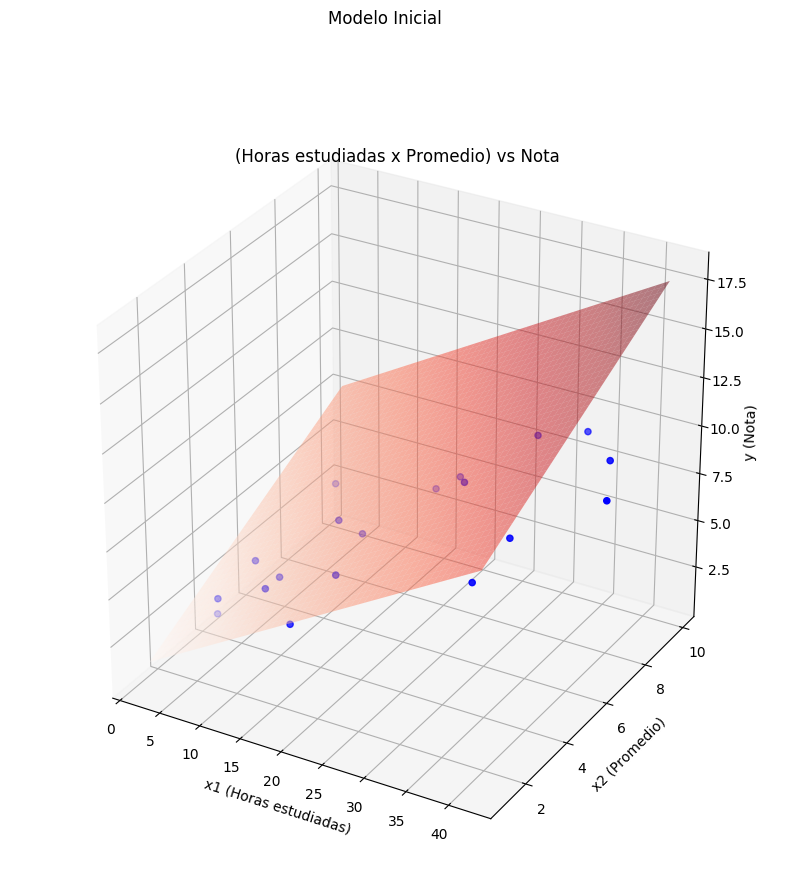

In [22]:
# visualización del modelo inicial
print(f"Modelo inicial: {rl}. Error cuadrático medio: {rl.error(x,y):.4f}")
utils.plot_regresion_lineal(rl.w,rl.b,x,y,title="Modelo Inicial")

In [23]:
#Entrenamiento del modelo
rl.fit(x,y,lr=0.001,epochs=100)

Epoch 1/100 => Error = 1.0026337249915322
Epoch 2/100 => Error = 0.7212868556051054
Epoch 3/100 => Error = 0.7152345747391072
Epoch 4/100 => Error = 0.7147879862654937
Epoch 5/100 => Error = 0.7144622295872705
Epoch 6/100 => Error = 0.7141456135616754
Epoch 7/100 => Error = 0.7138357252458585
Epoch 8/100 => Error = 0.7135323771022568
Epoch 9/100 => Error = 0.7132354297827269
Epoch 10/100 => Error = 0.7129447477880697
Epoch 11/100 => Error = 0.7126601985055355
Epoch 12/100 => Error = 0.7123816521298126
Epoch 13/100 => Error = 0.7121089816032347
Epoch 14/100 => Error = 0.7118420625576144
Epoch 15/100 => Error = 0.7115807732573114
Epoch 16/100 => Error = 0.711324994543511
Epoch 17/100 => Error = 0.7110746097796781
Epoch 18/100 => Error = 0.7108295047981656
Epoch 19/100 => Error = 0.7105895678479582
Epoch 20/100 => Error = 0.710354689543515
Epoch 21/100 => Error = 0.7101247628147006
Epoch 22/100 => Error = 0.7098996828577716
Epoch 23/100 => Error = 0.7096793470874074
Epoch 24/100 => Error 

Modelo inicial: RegresionLineal(w = [0.12057493 0.5656956 ], b = 0.23419). Error cuadrático medio: 0.7122


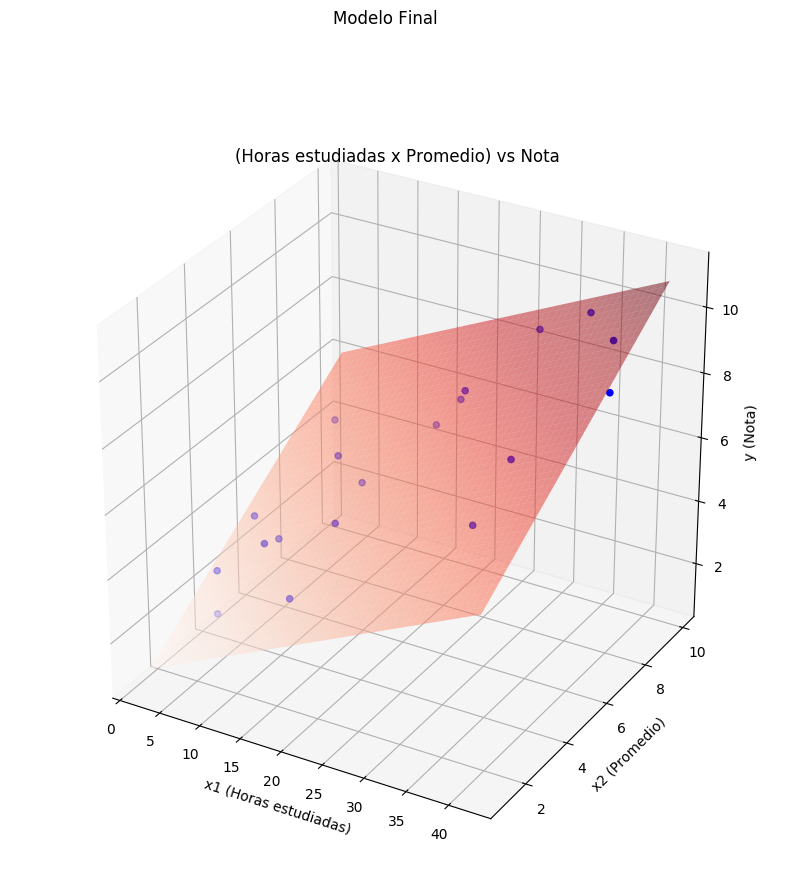

In [31]:
# visualiza el modelo y los datos
utils.plot_regresion_lineal(rl.w,rl.b,x,y,title="Modelo Final")
print(f"Modelo inicial: {rl}. Error cuadrático medio: {rl.error(x,y):.4f}")